<a href="https://colab.research.google.com/github/samuelpsouza/distributed-computing/blob/main/lab06/lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6 - Functional API TensorFlow

## Sequential API

In [4]:
import tensorflow as tf

In [5]:
def create_model_using_sequential_api():
    seq_model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation='softmax')
        ]
    )

    return seq_model

## Functional API

In [6]:
def create_model_using_functional_api():
    input_layer   = tf.keras.layers.Input(shape=(28, 28))

    # empilha as camadas usando: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense   = tf.keras.layers.Dense(128, activation='relu')(flatten_layer)
    output_layer  = tf.keras.layers.Dense(10, activation='softmax')(first_dense)

    # declara inputs e outputs
    func_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

    return func_model

## Visualizing the Model

In [7]:
!pip install pydot graphviz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


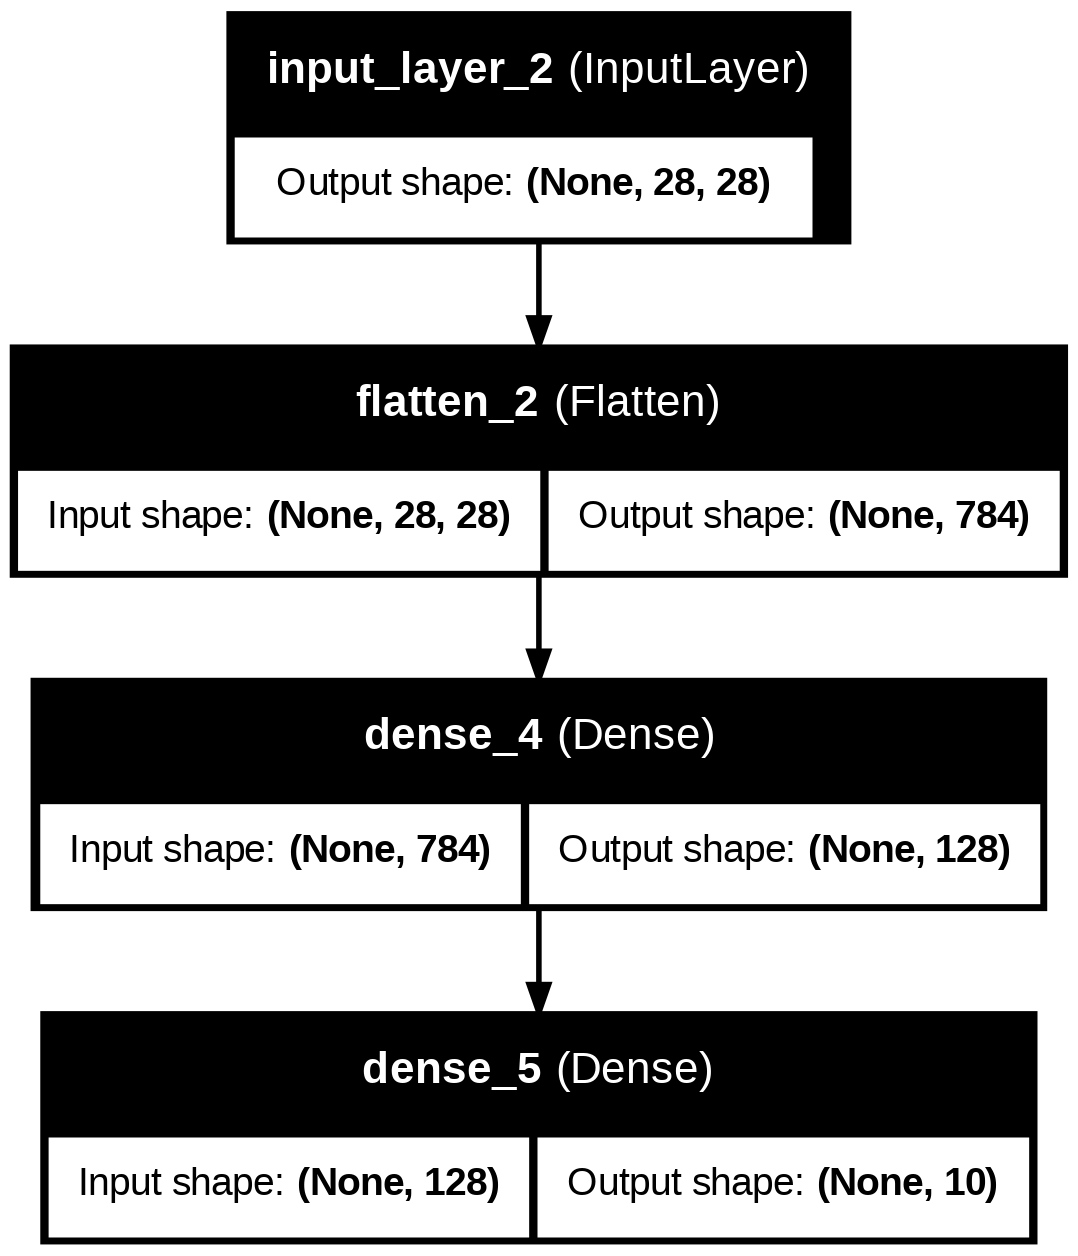

In [12]:
import pydot

func_model = create_model_using_functional_api()
sequ_model = create_model_using_sequential_api()

tf.keras.utils.plot_model(sequ_model, show_shapes=True, show_layer_names=True)
tf.keras.utils.plot_model(func_model, show_shapes=True, show_layer_names=True)

## Plot Results

In [20]:
import matplotlib.pyplot as plt

def plot_resultados_modelo(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Acurácia Treinamento', marker='o', color='blue')
  ax[0].plot(history.history['val_accuracy'], label='Acurácia Validação', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Loss Treinamento', marker='o', color='blue')
  ax[1].plot(history.history['val_loss'], label='Loss Validação', marker='o', color='red', linestyle='--')

  for _ in range(2):
      ax[_].set_xlabel('Época')
      ax[_].set_ylabel('Acurácia' if _ == 0 else 'Loss')
      ax[_].legend()
      ax[_].grid(True, linestyle=':')

## Training Model

In [21]:
#carrega dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

#normaliza dados
training_images = training_images / 255.0
test_images     = test_images / 255.0

#configura modelo
modelo = create_model_using_functional_api()
modelo.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#treina modelo
history = modelo.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), batch_size=64, verbose=2)

Epoch 1/20
938/938 - 3s - 4ms/step - accuracy: 0.8185 - loss: 0.5232 - val_accuracy: 0.8496 - val_loss: 0.4275
Epoch 2/20
938/938 - 5s - 5ms/step - accuracy: 0.8622 - loss: 0.3894 - val_accuracy: 0.8594 - val_loss: 0.3987
Epoch 3/20
938/938 - 3s - 3ms/step - accuracy: 0.8741 - loss: 0.3496 - val_accuracy: 0.8658 - val_loss: 0.3761
Epoch 4/20
938/938 - 2s - 3ms/step - accuracy: 0.8824 - loss: 0.3222 - val_accuracy: 0.8597 - val_loss: 0.3938
Epoch 5/20
938/938 - 3s - 3ms/step - accuracy: 0.8884 - loss: 0.3046 - val_accuracy: 0.8694 - val_loss: 0.3576
Epoch 6/20
938/938 - 4s - 4ms/step - accuracy: 0.8932 - loss: 0.2907 - val_accuracy: 0.8719 - val_loss: 0.3590
Epoch 7/20
938/938 - 4s - 4ms/step - accuracy: 0.8974 - loss: 0.2756 - val_accuracy: 0.8781 - val_loss: 0.3513
Epoch 8/20
938/938 - 2s - 3ms/step - accuracy: 0.9014 - loss: 0.2667 - val_accuracy: 0.8784 - val_loss: 0.3506
Epoch 9/20
938/938 - 3s - 3ms/step - accuracy: 0.9036 - loss: 0.2590 - val_accuracy: 0.8748 - val_loss: 0.3597
E

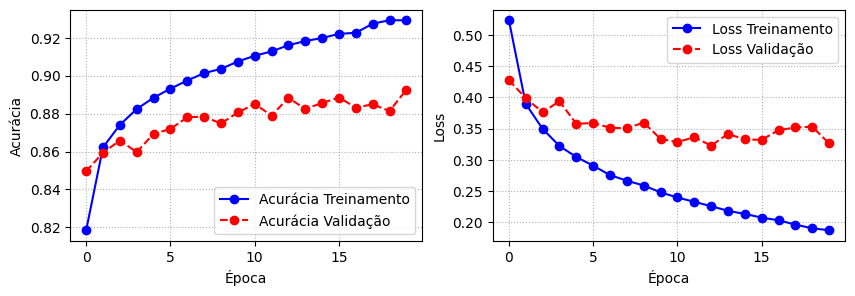

In [23]:
plot_resultados_modelo(history)

## Models with Multiple Inputs and Outputs

### Preparing the Data

In [24]:
import pandas as pd

data_url_red   = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data_url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Carregar o dataset
data_red             = pd.read_csv(data_url_red, delimiter=';')
data_red['classe']   = 1
data_white           = pd.read_csv(data_url_white, delimiter=';')
data_white['classe'] = 0
data                 = pd.concat([data_red, data_white])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classe
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


### Normalizing and Spliting the Data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar as entradas e saídas
y     = data['quality']
y_bin = data['classe']

X = data.drop(columns=['quality', 'classe'])


# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test, y_bin_train, y_bin_test = train_test_split(X, y, y_bin, test_size=0.2, random_state=42)

# Normalizar os dados
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

### Creating the Model

In [26]:
def cria_modelo_multiplas_saidas():
    entrada = tf.keras.layers.Input(shape=(11, ))

    dense_1 = tf.keras.layers.Dense(128, activation='relu')(entrada)
    dense_2 = tf.keras.layers.Dense(64, activation='relu')(dense_1)

    saida_1 = tf.keras.layers.Dense(1, name='qualidade')(dense_2)

    dense_3 = tf.keras.layers.Dense(64, activation='relu')(dense_2)
    saida_2 = tf.keras.layers.Dense(1, activation='sigmoid', name='classe')(dense_3)

    modelo_2_saidas = tf.keras.models.Model(inputs=entrada, outputs=[saida_1, saida_2])

    return modelo_2_saidas

In [28]:
model = cria_modelo_multiplas_saidas()
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 11)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 128)            │          1,536 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 64)             │          8,256 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 64)             │          4,160 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ qualidade (Dense)         │ (None, 1)              │             65 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classe (Dense)            │ (None, 1)              │             65 │ dense_17[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,082 (55.01 KB)

 Trainable params: 14,082 (55.01 KB)

 Non-trainable params: 0 (0.00 B)

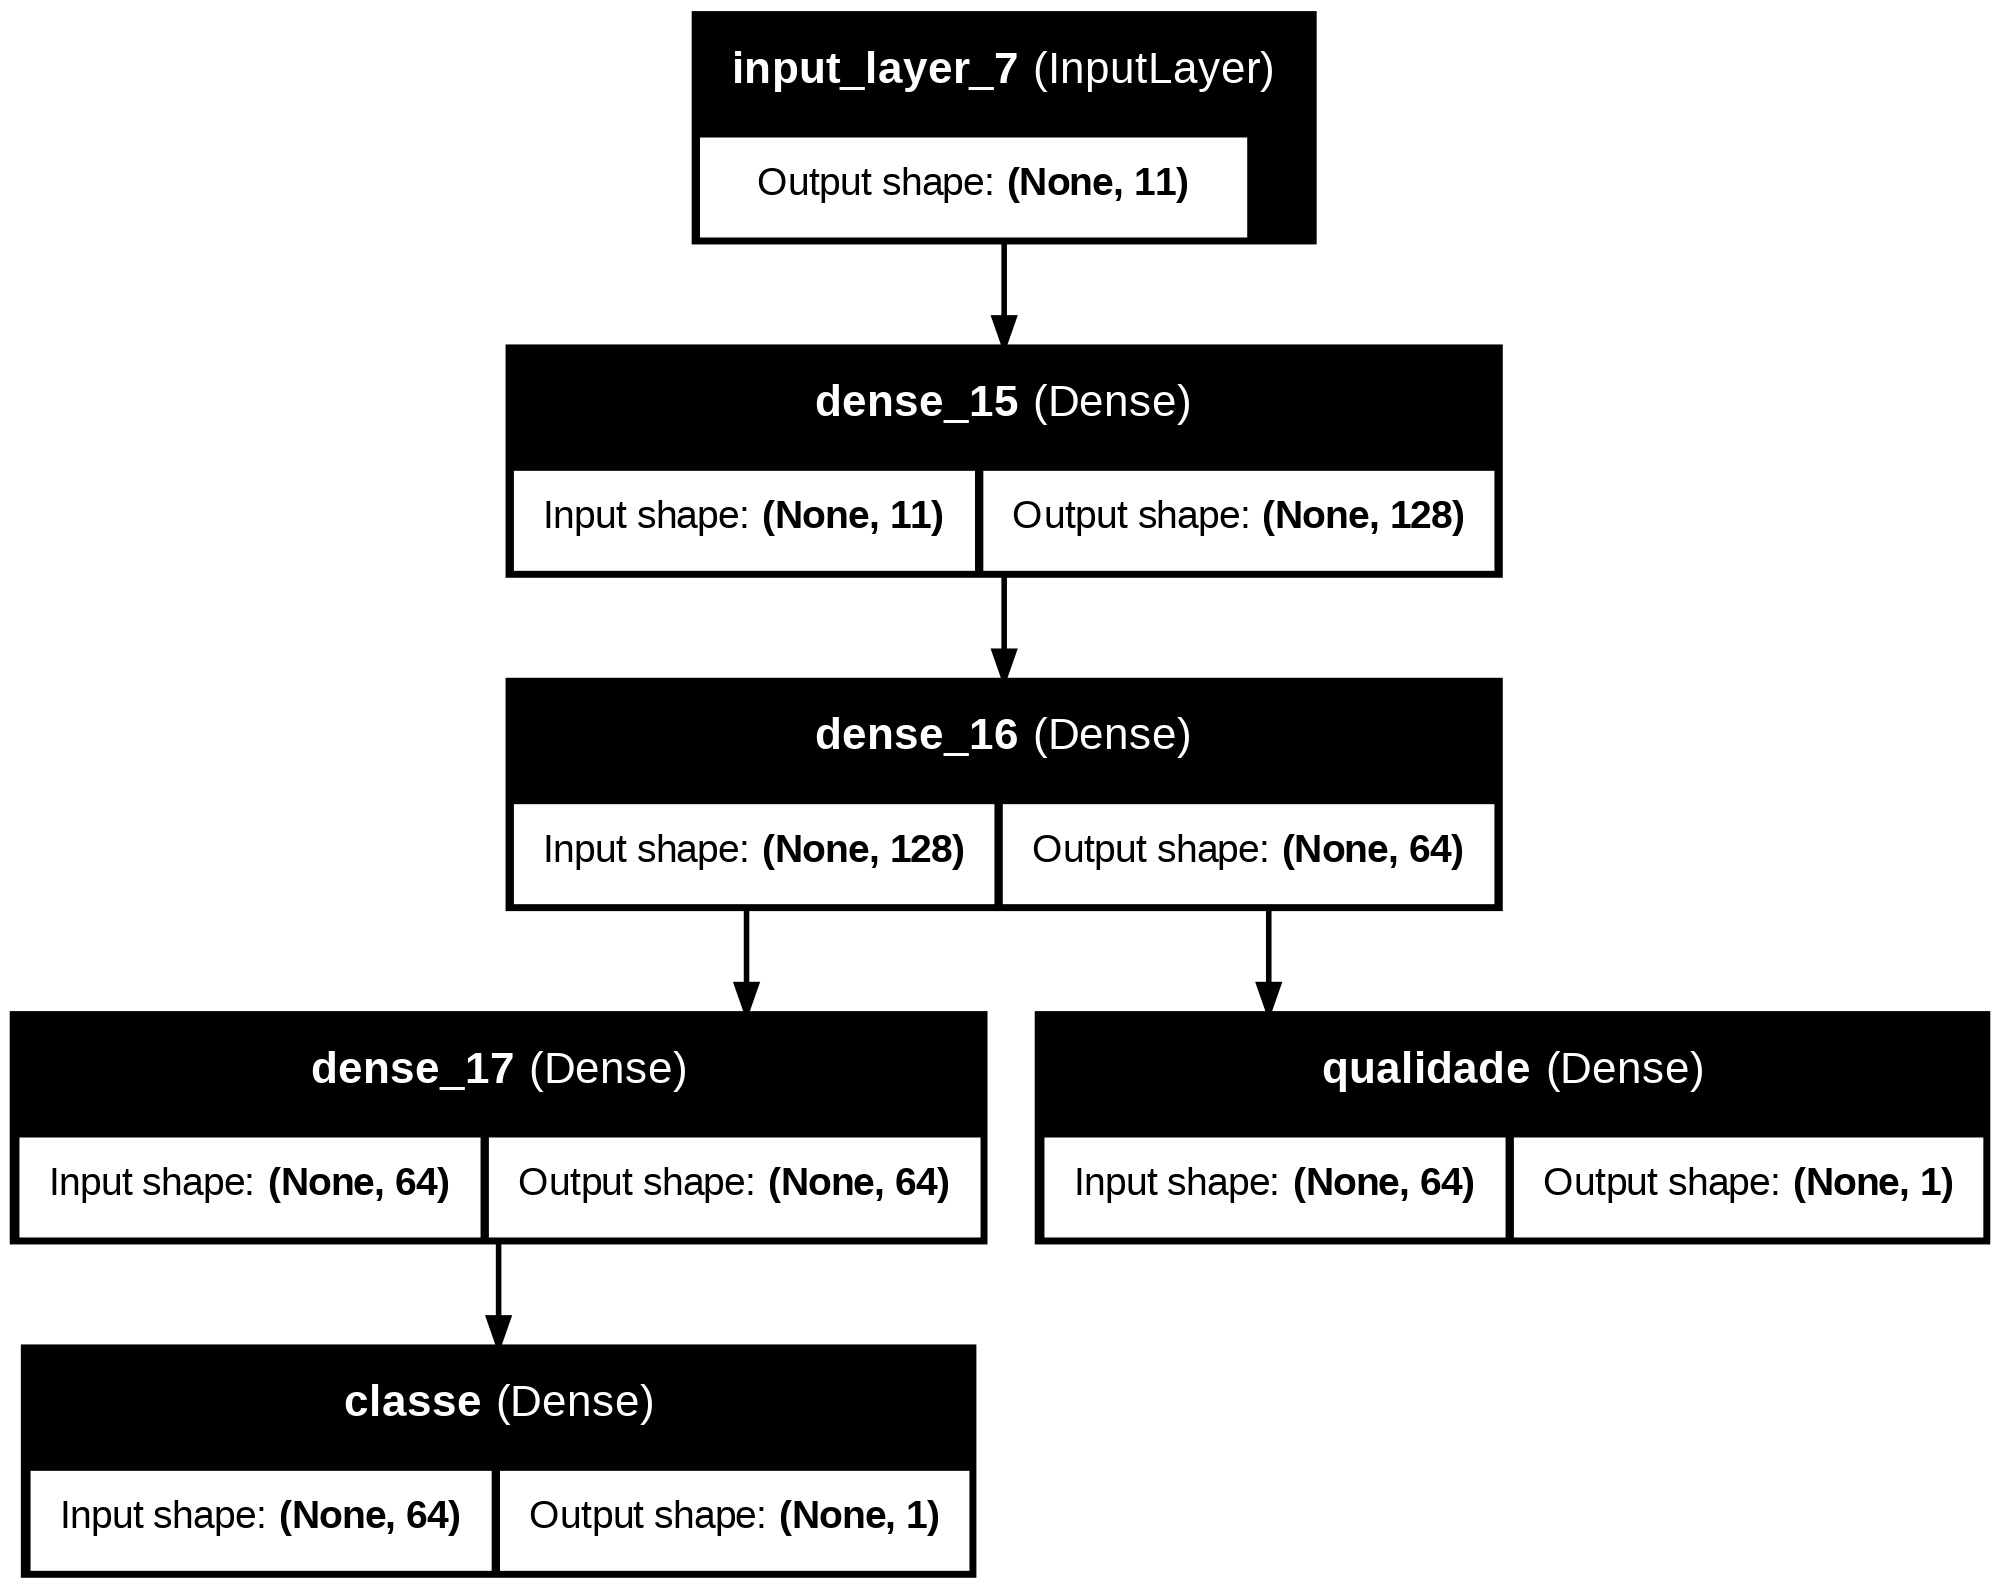

In [29]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

### Compiling the Model

In [30]:
model.compile(
    optimizer='adam',
    loss={
        'qualidade': 'mse',
        'classe': 'binary_crossentropy'
    },
    metrics={
        'qualidade': 'mae',
        'classe': 'accuracy'
    }
)

### Training the Model

In [32]:
history = model.fit(
    X_train, {'qualidade': y_train, 'classe': y_bin_train},
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - classe_accuracy: 0.8924 - loss: 11.4147 - qualidade_mae: 2.6657 - val_classe_accuracy: 0.9981 - val_loss: 1.4904 - val_qualidade_mae: 0.9562
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - classe_accuracy: 0.9897 - loss: 1.5626 - qualidade_mae: 0.9303 - val_classe_accuracy: 0.9923 - val_loss: 1.0851 - val_qualidade_mae: 0.8060
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - classe_accuracy: 0.9944 - loss: 1.0360 - qualidade_mae: 0.7823 - val_classe_accuracy: 0.9942 - val_loss: 0.8229 - val_qualidade_mae: 0.6910
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - classe_accuracy: 0.9920 - loss: 0.7914 - qualidade_mae: 0.6872 - val_classe_accuracy: 0.9923 - val_loss: 0.6442 - val_qualidade_mae: 0.6015
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - classe_accuracy: 0.9955 - loss: 0.6319 - qualidade_mae: 0.6073 - val_classe_accuracy: 0.9942 - val_loss: 0.6106 - val_qualidade_mae: 0.5793
Epoch 6/10
147/147 ━━━━━━━━━━

### Viewing the Results

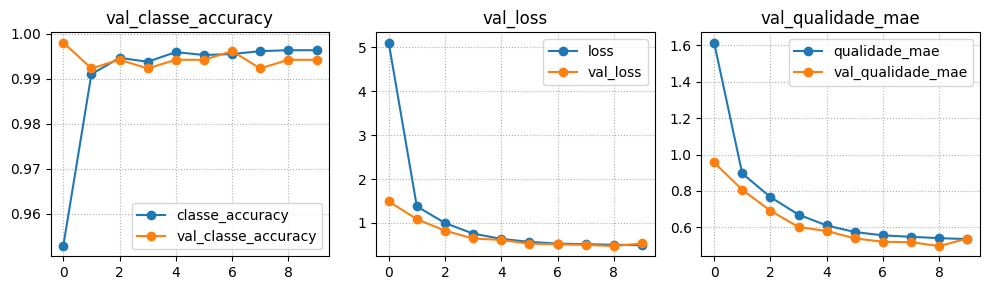

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs      = axs.flatten()

for idx, chave in enumerate(history.history.keys()):
    axs[idx%3].plot(history.history[chave], label=chave, marker='o')
    axs[idx%3].set_title(chave)
    axs[idx%3].grid(True, linestyle=':')
    axs[idx%3].legend()

plt.tight_layout()
plt.show()

### Customizing the Loss Function

In [37]:
def calcula_loss(model, X, y_quality, y_class):
    mse_loss = tf.keras.losses.MeanSquaredError()
    binary_crossentropy_loss = tf.keras.losses.BinaryCrossentropy()

    predictions    = model(X)

    qualidade_loss = mse_loss(y_quality, predictions[0])
    classe_loss    = binary_crossentropy_loss(y_class, predictions[1])
    total_loss     = qualidade_loss + classe_loss

    return total_loss

### Defining the Training Function

In [38]:
def treina_modelo(modelo, X, y_qualidade, y_classe, optimizer, train_mae, train_accuracy):
    with tf.GradientTape() as tape:
        loss = calcula_loss(modelo, X, y_qualidade, y_classe)

    # Calcular os gradientes
    gradients = tape.gradient(loss, modelo.trainable_variables)

    # Atualizar os pesos
    optimizer.apply_gradients(zip(gradients, modelo.trainable_variables))

    #predict
    predictions = modelo.predict(X, verbose=0)

    train_mae.update_state(y_qualidade, predictions[0])
    train_accuracy.update_state(y_classe, predictions[1])

    return loss

### Training the Model

In [39]:
modelo         = cria_modelo_multiplas_saidas()
optimizer      = tf.keras.optimizers.Adam()
train_mae      = tf.keras.metrics.MeanAbsoluteError()
train_accuracy = tf.keras.metrics.BinaryAccuracy()

losses, accs, maes = [], [], []

epochs = 100
for epoch in range(epochs):
    train_mae.reset_state()
    train_accuracy.reset_state()

    loss = treina_modelo(modelo, X_train, y_train, y_bin_train, optimizer, train_mae, train_accuracy)
    losses.append(loss.numpy())
    accs.append(train_accuracy.result().numpy())
    maes.append(train_mae.result().numpy())
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy()}, MAE {train_mae.result().numpy()}, Accuracy {train_accuracy.result().numpy()}")

Epoch 0, Loss: 33.88872146606445, MAE 5.569365501403809, Accuracy 0.6317105889320374


### The Results

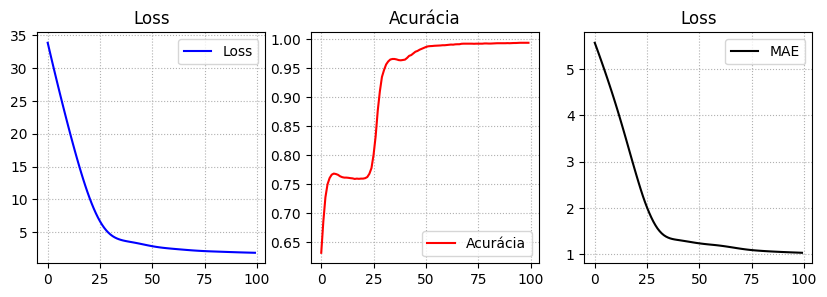

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs      = axs.flatten()

axs[0].plot(losses, label='Loss', color='b')
axs[0].set_title('Loss')

axs[1].plot(accs, label='Acurácia', color='r')
axs[1].set_title('Acurácia')

axs[2].plot(maes, label='MAE', color='k')
axs[2].set_title('Loss')


for i in range(3):
  axs[i].grid(True, linestyle=':')
  axs[i].legend()